In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.decomposition import SparsePCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
from sklearn.model_selection import cross_val_score
import numpy as np

## Load the dataset

In [12]:
gdp_data = pd.read_csv('gdp.csv')
gdp_growth_data = pd.read_csv('gdp_growth.csv')
gdp_per_capita_data = pd.read_csv('gdp_per_capita.csv')
gdp_per_capita_growth_data = pd.read_csv('gdp_per_capita_growth.csv')
gdp_ppp_data = pd.read_csv('gdp_ppp.csv')
gdp_ppp_per_capita_data = pd.read_csv('gdp_ppp_per_capita.csv')

## Merge datasets based on a common identifier, such as country name or code

In [13]:
merged_data = pd.merge(gdp_data, gdp_growth_data, on='Code', suffixes=('_gdp', '_growth'))
merged_data = pd.merge(merged_data, gdp_per_capita_data, on='Code', suffixes=('_merged', '_per_capita'))
merged_data = pd.merge(merged_data, gdp_per_capita_growth_data, on='Code', suffixes=('_per_capita', '_growth'))
merged_data = pd.merge(merged_data, gdp_ppp_data, on='Code', suffixes=('_per_capita_growth', '_ppp'))
merged_data = pd.merge(merged_data, gdp_ppp_per_capita_data, on='Code', suffixes=('_ppp', '_ppp_per_capita'))

## Data Preprocessing 

In [14]:
merged_data.fillna(0, inplace=True)

In [16]:
merged_data.drop(columns=['Unnamed: 65_ppp_per_capita'], inplace=True)

In [17]:
merged_data.describe()

,1960_gdp,1961_gdp,1962_gdp,1963_gdp,1964_gdp,1965_gdp,1966_gdp,1967_gdp,1968_gdp,1969_gdp,...,2011_ppp_per_capita,2012_ppp_per_capita,2013_ppp_per_capita,2014_ppp_per_capita,2015_ppp_per_capita,2016_ppp_per_capita,2017_ppp_per_capita,2018_ppp_per_capita,2019_ppp_per_capita,2020_ppp_per_capita
count,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,...,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000
mean,3.468988e+10,3.652043e+10,3.893738e+10,4.199242e+10,4.612218e+10,5.059254e+10,5.743979e+10,6.077339e+10,6.577645e+10,7.273549e+10,...,16286.561803,16674.701325,17200.571858,17511.128653,17187.643999,17652.770598,18532.584748,19174.138319,19522.557729,18187.839685
std,1.548723e+11,1.612815e+11,1.730048e+11,1.861426e+11,2.036066e+11,2.215232e+11,2.450395e+11,2.614017e+11,2.824887e+11,3.109694e+11,...,19928.410648,20554.707272,21075.048670,21036.193302,19413.191491,19726.388556,20848.688612,21718.666305,22034.646255,20437.504557
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,3015.340891,2955.725153,3257.048607,3327.484626,3436.961416,3532.591249,3704.767015,3816.808981,3842.822860,3637.878556
50%,0.000000e+00,1.203762e+07,2.319090e+07,2.383622e+07,2.579343e+07,1.565725e+08,2.030047e+08,2.345520e+08,3.029323e+08,3.122410e+08,...,9771.783393,10307.714539,10880.368470,11156.577289,11169.751121,11170.284778,11798.981083,12475.287499,12902.591969,11621.023475
75%,2.061387e+09,3.000446e+09,3.303378e+09,3.829540e+09,3.781582e+09,5.112313e+09,6.051139e+09,5.927356e+09,7.404536e+09,8.447528e+09,...,21588.896867,22083.689924,22589.119565,24055.211384,24080.791795,25462.342880,26902.574038,28109.700137,27329.701646,25088.543467
max,1.387318e+12,1.443856e+12,1.545481e+12,1.666138e+12,1.824277e+12,1.987340e+12,2.156806e+12,2.294908e+12,2.476959e+12,2.732048e+12,...,139358.965293,141634.703825,153563.910960,152856.341085,116298.729552,114893.015331,126144.104058,135551.807873,132654.896700,117500.207222


In [20]:
from sklearn.impute import SimpleImputer

# Identify non-numeric columns
non_numeric_columns = merged_data.select_dtypes(exclude=['number']).columns

# Drop non-numeric columns
merged_data_numeric = merged_data.drop(columns=non_numeric_columns)

# Impute missing values using mean imputation
imputer = SimpleImputer(strategy='mean')
merged_data_imputed = imputer.fit_transform(merged_data_numeric)

# Convert the imputed array back to a DataFrame
merged_data_imputed = pd.DataFrame(merged_data_imputed, columns=merged_data_numeric.columns)


In [22]:
merged_data_imputed.describe()

,1960_gdp,1961_gdp,1962_gdp,1963_gdp,1964_gdp,1965_gdp,1966_gdp,1967_gdp,1968_gdp,1969_gdp,...,2011_ppp_per_capita,2012_ppp_per_capita,2013_ppp_per_capita,2014_ppp_per_capita,2015_ppp_per_capita,2016_ppp_per_capita,2017_ppp_per_capita,2018_ppp_per_capita,2019_ppp_per_capita,2020_ppp_per_capita
count,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,...,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000
mean,3.468988e+10,3.652043e+10,3.893738e+10,4.199242e+10,4.612218e+10,5.059254e+10,5.743979e+10,6.077339e+10,6.577645e+10,7.273549e+10,...,16286.561803,16674.701325,17200.571858,17511.128653,17187.643999,17652.770598,18532.584748,19174.138319,19522.557729,18187.839685
std,1.548723e+11,1.612815e+11,1.730048e+11,1.861426e+11,2.036066e+11,2.215232e+11,2.450395e+11,2.614017e+11,2.824887e+11,3.109694e+11,...,19928.410648,20554.707272,21075.048670,21036.193302,19413.191491,19726.388556,20848.688612,21718.666305,22034.646255,20437.504557
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,3015.340891,2955.725153,3257.048607,3327.484626,3436.961416,3532.591249,3704.767015,3816.808981,3842.822860,3637.878556
50%,0.000000e+00,1.203762e+07,2.319090e+07,2.383622e+07,2.579343e+07,1.565725e+08,2.030047e+08,2.345520e+08,3.029323e+08,3.122410e+08,...,9771.783393,10307.714539,10880.368470,11156.577289,11169.751121,11170.284778,11798.981083,12475.287499,12902.591969,11621.023475
75%,2.061387e+09,3.000446e+09,3.303378e+09,3.829540e+09,3.781582e+09,5.112313e+09,6.051139e+09,5.927356e+09,7.404536e+09,8.447528e+09,...,21588.896867,22083.689924,22589.119565,24055.211384,24080.791795,25462.342880,26902.574038,28109.700137,27329.701646,25088.543467
max,1.387318e+12,1.443856e+12,1.545481e+12,1.666138e+12,1.824277e+12,1.987340e+12,2.156806e+12,2.294908e+12,2.476959e+12,2.732048e+12,...,139358.965293,141634.703825,153563.910960,152856.341085,116298.729552,114893.015331,126144.104058,135551.807873,132654.896700,117500.207222


## Splitting the Dataset, Testing and Training

In [23]:
# Split the data into features (X) and target variables (y)
target_variables = ['1960_gdp', '2020_ppp_per_capita']

for target_variable in target_variables:
    # Split the data into features (X) and target variable (y)
    X = merged_data_imputed.drop(columns=target_variable)
    y = merged_data_imputed[target_variable]

    # Split the data into training and testing sets (80% train, 20% test)
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Print the shapes of the training and testing sets
    print(f"Target variable: {target_variable}")
    print("X_train shape:", X_train.shape)
    print("X_test shape:", X_test.shape)
    print("y_train shape:", y_train.shape)
    print("y_test shape:", y_test.shape)
    print()

Target variable: 1960_gdp
X_train shape: (212, 370)
X_test shape: (54, 370)
y_train shape: (212,)
y_test shape: (54,)

Target variable: 2020_ppp_per_capita
X_train shape: (212, 370)
X_test shape: (54, 370)
y_train shape: (212,)
y_test shape: (54,)



## Feature Scaling and Lasso Regression

In [24]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Define Lasso regression model
lasso_model = Lasso(max_iter=10000)  # Increase max_iter for more iterations

# Define alpha values to search
lasso_params = {'lasso__alpha': [0.001, 0.01, 0.1, 1, 10]}  # Note the 'lasso__' prefix

# Pipeline for scaling and Lasso regression
lasso_pipeline = Pipeline([
    ('scaler', scaler),
    ('lasso', lasso_model)
])

# Grid search with cross-validation
lasso_grid = GridSearchCV(lasso_pipeline, lasso_params, cv=5, scoring='neg_mean_squared_error')
lasso_grid.fit(X_train, y_train)

# Best Lasso model
lasso_best_model = lasso_grid.best_estimator_

# Print best alpha and best score
print("Best alpha:", lasso_grid.best_params_)
print("Best score:", lasso_grid.best_score_)

C:\Users\Probook\anaconda3\envs\mlabs\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.313e+06, tolerance: 6.577e+06
  model = cd_fast.enet_coordinate_descent(
C:\Users\Probook\anaconda3\envs\mlabs\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.909e+06, tolerance: 6.855e+06
  model = cd_fast.enet_coordinate_descent(


Best alpha: {'lasso__alpha': 10}
Best score: -30402701.067378074


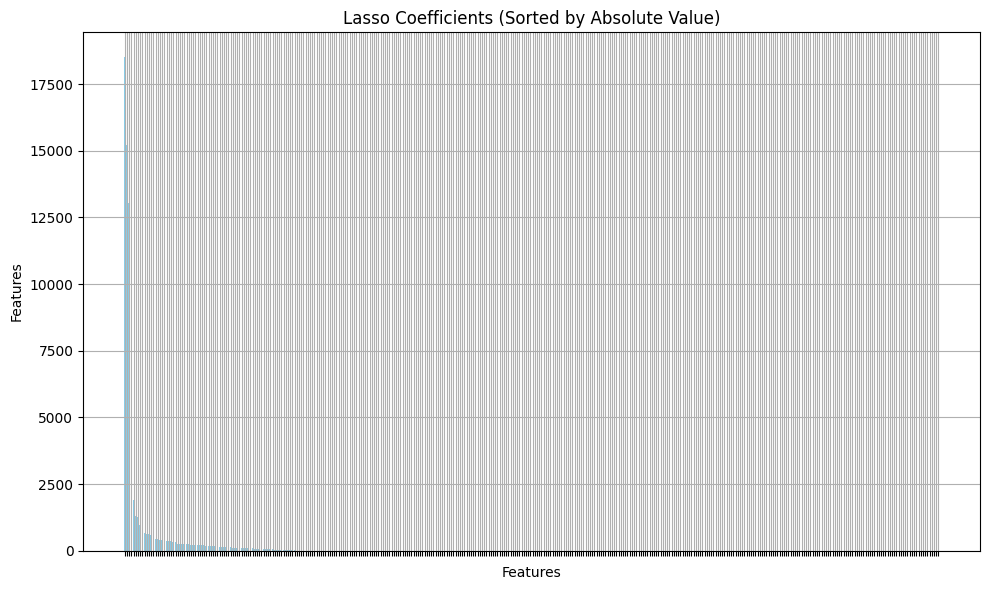

In [41]:
# Plot Lasso coefficients sorted by absolute value with clean y-axis label
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_names)), abs_coefficients[sorted_indices], color='skyblue')
plt.xticks(range(len(feature_names)), [])  # Remove x-axis tick labels
plt.title('Lasso Coefficients (Sorted by Absolute Value)')
plt.xlabel('Features')
plt.ylabel('Features')  # Set y-axis label to "Features"
plt.grid(True)
plt.tight_layout()
plt.show()


In [27]:
from sklearn.decomposition import SparsePCA

# Define Sparse PCA model
sparse_pca = SparsePCA(n_components=5)

# Fit Sparse PCA to the training data
sparse_pca.fit(X_train)

# Transform the training data using Sparse PCA
X_train_sparse_pca = sparse_pca.transform(X_train)

# Transform the testing data using Sparse PCA
X_test_sparse_pca = sparse_pca.transform(X_test)

In [29]:
# Print the components of Sparse PCA
print("Sparse PCA components:")
print(sparse_pca.components_)

# Print the transformed training data
print("\nTransformed training data shape after Sparse PCA:", X_train_sparse_pca.shape)
print("Transformed training data after Sparse PCA:")
print(X_train_sparse_pca)

# Print the transformed testing data
print("\nTransformed testing data shape after Sparse PCA:", X_test_sparse_pca.shape)
print("Transformed testing data after Sparse PCA:")
print(X_test_sparse_pca)


Sparse PCA components:
[[ 2.15899954e-03  2.20417295e-03  2.33441051e-03 ...  4.09800956e-11
   4.55683382e-11  4.90030879e-11]
 [ 4.99622992e-03  5.60744856e-03  6.22088271e-03 ...  4.45971139e-10
   4.59783663e-10  4.67596677e-10]
 [ 2.98910070e-03  1.66674482e-03  1.51036500e-03 ...  5.67535259e-10
   6.14239739e-10  6.64673217e-10]
 [-3.97243193e-02 -4.12751053e-02 -4.41604068e-02 ...  2.40264075e-10
   2.90006541e-10  2.84381262e-10]
 [-1.02812011e-02 -1.59245169e-02 -1.71575277e-02 ... -2.48065763e-09
  -2.53481408e-09 -2.56634265e-09]]

Transformed training data shape after Sparse PCA: (212, 5)
Transformed training data after Sparse PCA:
[[-1.56644228e+13  4.50933383e+11  5.98454457e+10  1.94284469e+10
   1.24765374e+10]
 [-1.12098434e+13  2.01394593e+12  1.38676388e+11  2.03613691e+11
   2.79020386e+10]
 [-1.62707196e+13  6.01797698e+11  1.51294628e+11 -7.02889684e+09
   3.85546531e+10]
 ...
 [-1.61629765e+13  5.87588767e+11  1.69782575e+11  1.80012022e+09
   3.24613381e+10]
 [

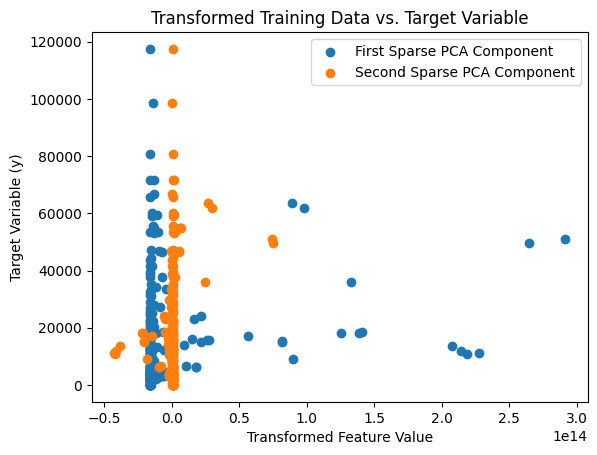

In [30]:
import matplotlib.pyplot as plt

# Visualize transformed training data with respect to target variable
plt.scatter(X_train_sparse_pca[:, 0], y_train, label="First Sparse PCA Component")
plt.scatter(X_train_sparse_pca[:, 1], y_train, label="Second Sparse PCA Component")
plt.xlabel("Transformed Feature Value")
plt.ylabel("Target Variable (y)")
plt.legend()
plt.title("Transformed Training Data vs. Target Variable")
plt.show()


In [33]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define the Random Forest Regression model
random_forest_model = RandomForestRegressor(random_state=42)

# Define hyperparameters to search
random_forest_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Randomized search with cross-validation
random_forest_random = RandomizedSearchCV(random_forest_model, random_forest_params, n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
random_forest_random.fit(X_train, y_train)

# Best Random Forest model
random_forest_best_model = random_forest_random.best_estimator_

# Print best parameters and best score
print("Best parameters:", random_forest_random.best_params_)
print("Best score:", random_forest_random.best_score_)

Best parameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': None}
Best score: -44179233.15117209


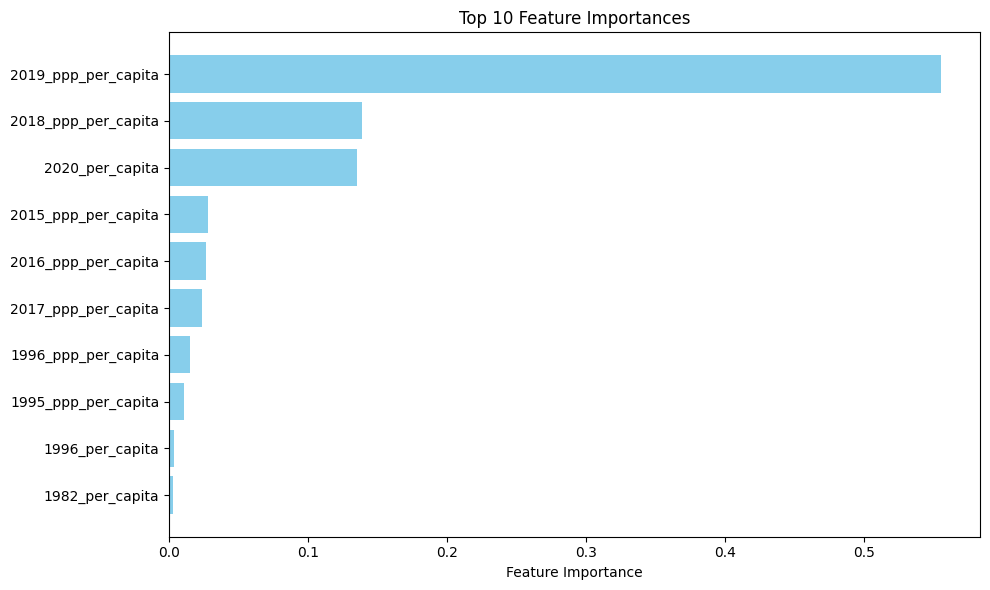

In [35]:
import matplotlib.pyplot as plt

# Get feature importances
importances = random_forest_best_model.feature_importances_
features = X_train.columns

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Number of top features to display
top_n = 10

# Plot feature importances for top N features
plt.figure(figsize=(10, 6))
plt.title("Top {} Feature Importances".format(top_n))
plt.barh(range(top_n), importances[indices[:top_n]], color="skyblue")
plt.yticks(range(top_n), [features[i] for i in indices[:top_n]])
plt.xlabel("Feature Importance")
plt.gca().invert_yaxis()  # Invert y-axis to display most important features on top
plt.tight_layout()
plt.show()

In [53]:
from sklearn.decomposition import PCA
from sklearn.utils import resample
import numpy as np

# Define the number of bootstrap samples
n_bootstrap_samples = 100

# Define lists to store model performances
lasso_scores = [-30402701.067378074]
pca_scores = [0.0055]
random_forest_scores = [-44179233.15117209]

# Create PCA model
pca_model = PCA(n_components= 5)

# Bootstrap resampling loop
for _ in range(n_bootstrap_samples):
    # Generate a bootstrap sample
    X_boot, y_boot = resample(X_train, y_train)
    
    # Fit Lasso Regression model
    lasso_model.fit(X_boot, y_boot)
    lasso_score = lasso_model.score(X_test, y_test)
    lasso_scores.append(lasso_score)
    
    # Fit PCA model and transform data
    X_boot_pca = pca_model.fit_transform(X_boot)
    X_test_pca = pca_model.transform(X_test)
    
    # Fit Random Forest model
    random_forest_model.fit(X_boot_pca, y_boot)
    random_forest_score = random_forest_model.score(X_test_pca, y_test)
    random_forest_scores.append(random_forest_score)

    # Calculate PCA score
    pca_score = random_forest_model.score(X_test_pca, y_test)
    pca_scores.append(pca_score)

# Aggregate scores
lasso_avg_score = np.mean(lasso_scores)
pca_avg_score = np.mean(pca_scores)
random_forest_avg_score = np.mean(random_forest_scores)

# Print average scores
print("Average Lasso Regression score:", lasso_avg_score)
print("Average PCA score:", pca_avg_score)
print("Average Random Forest score:", random_forest_avg_score)


C:\Users\Probook\anaconda3\envs\mlabs\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.976e+06, tolerance: 8.446e+06
  model = cd_fast.enet_coordinate_descent(


Average Lasso Regression score: -301016.09891721903
Average PCA score: 0.4743967566296644
Average Random Forest score: -437417.67566930345


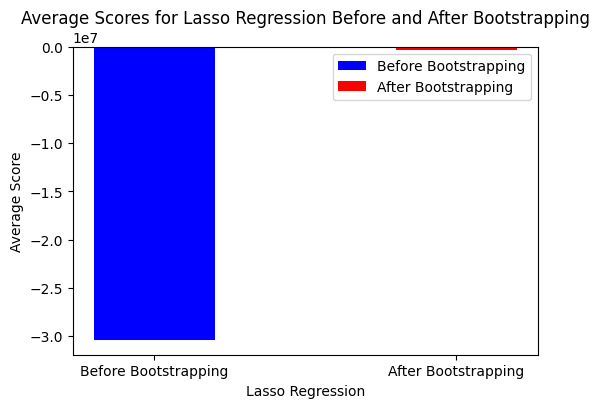

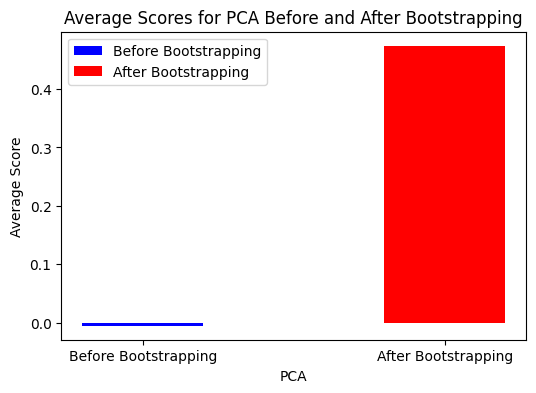

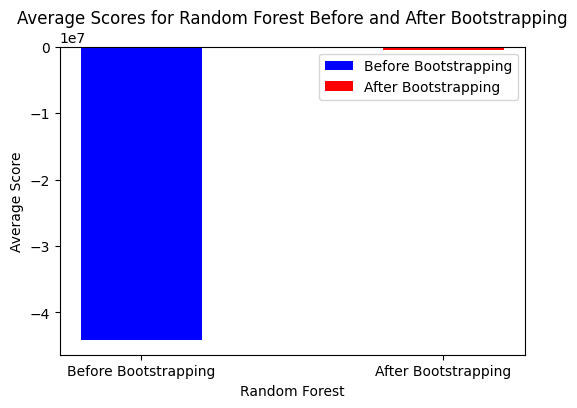

In [55]:
import matplotlib.pyplot as plt

# Define model names
models = ['Lasso Regression', 'PCA', 'Random Forest']

# Define average scores before bootstrapping
before_bootstrapping = [-30402701.0673780749, -0.0055, -44179233.15117209]  # Fill in the average scores

# Define average scores after bootstrapping
after_bootstrapping = [-301016.1092298386,  0.4743967566296644, -437417.66469675064]  # Fill in the average scores

# Plotting for Lasso Regression
plt.figure(figsize=(6, 4))
plt.bar('Before Bootstrapping', before_bootstrapping[0], color='b', width=0.4, label='Before Bootstrapping')
plt.bar('After Bootstrapping', after_bootstrapping[0], color='r', width=0.4, label='After Bootstrapping')
plt.xlabel('Lasso Regression')
plt.ylabel('Average Score')
plt.title('Average Scores for Lasso Regression Before and After Bootstrapping')
plt.legend()
plt.show()

# Plotting for PCA
plt.figure(figsize=(6, 4))
plt.bar('Before Bootstrapping', before_bootstrapping[1], color='b', width=0.4, label='Before Bootstrapping')
plt.bar('After Bootstrapping', after_bootstrapping[1], color='r', width=0.4, label='After Bootstrapping')
plt.xlabel('PCA')
plt.ylabel('Average Score')
plt.title('Average Scores for PCA Before and After Bootstrapping')
plt.legend()
plt.show()

# Plotting for Random Forest
plt.figure(figsize=(6, 4))
plt.bar('Before Bootstrapping', before_bootstrapping[2], color='b', width=0.4, label='Before Bootstrapping')
plt.bar('After Bootstrapping', after_bootstrapping[2], color='r', width=0.4, label='After Bootstrapping')
plt.xlabel('Random Forest')
plt.ylabel('Average Score')
plt.title('Average Scores for Random Forest Before and After Bootstrapping')
plt.legend()
plt.show()


In [57]:
from sklearn.model_selection import cross_val_score

# Define cross-validation function
def perform_cross_validation(model, X, y, cv=5):
    scores = cross_val_score(model, X, y, cv=cv)
    return scores.mean(), scores.std()
    
# Example usage
lasso_cv_mean, lasso_cv_std = perform_cross_validation(lasso_model, X, y)
print(f"Lasso Regression CV Mean: {lasso_cv_mean}, Std: {lasso_cv_std}")

C:\Users\Probook\anaconda3\envs\mlabs\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.670e+07, tolerance: 8.466e+06
  model = cd_fast.enet_coordinate_descent(
C:\Users\Probook\anaconda3\envs\mlabs\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.271e+07, tolerance: 9.360e+06
  model = cd_fast.enet_coordinate_descent(
C:\Users\Probook\anaconda3\envs\mlabs\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularis

Lasso Regression CV Mean: 0.9051705476246837, Std: 0.04138542910458978


C:\Users\Probook\anaconda3\envs\mlabs\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.617e+07, tolerance: 9.892e+06
  model = cd_fast.enet_coordinate_descent(


In [58]:
from sklearn.model_selection import GridSearchCV

# Define grid search for hyperparameter tuning
param_grid = {'alpha': [0.01, 0.1, 1, 10]}
lasso_grid = GridSearchCV(lasso_model, param_grid, cv=5)
lasso_grid.fit(X_train, y_train)

# Get best hyperparameters
best_alpha = lasso_grid.best_params_['alpha']
print(f"Best alpha for Lasso Regression: {best_alpha}")


C:\Users\Probook\anaconda3\envs\mlabs\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.765e+06, tolerance: 6.577e+06
  model = cd_fast.enet_coordinate_descent(
C:\Users\Probook\anaconda3\envs\mlabs\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.051e+06, tolerance: 5.922e+06
  model = cd_fast.enet_coordinate_descent(
C:\Users\Probook\anaconda3\envs\mlabs\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularis

Best alpha for Lasso Regression: 10


C:\Users\Probook\anaconda3\envs\mlabs\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.748e+07, tolerance: 8.392e+06
  model = cd_fast.enet_coordinate_descent(


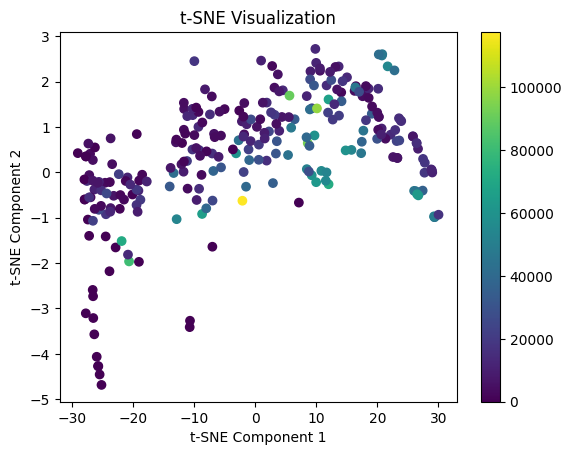

In [59]:
from sklearn.manifold import TSNE

# Perform t-SNE dimensionality reduction
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)

# Plot t-SNE visualization
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis')
plt.title('t-SNE Visualization')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar()
plt.show()
